In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_titles1.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [8]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
df['type'].value_counts(normalize=True)

type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64

<Axes: ylabel='count'>

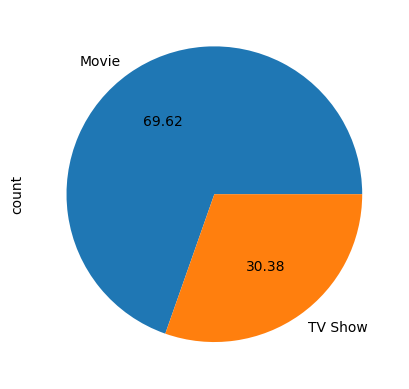

In [10]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f")

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [13]:
df_new=pd.DataFrame(constraint,index=df['title'])

In [14]:
df_new=df_new.stack()

In [15]:
df_new=pd.DataFrame(df_new)

In [16]:
df_new

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [17]:
df_new.reset_index(inplace=True)

In [18]:
df_new=df_new[['title',0]]

In [19]:
df_new.columns=['title','cast']

In [20]:
df_new[df_new['cast']=='Rupa Bhimani']

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani
3421,Chhota Bheem and the Incan Adventure,Rupa Bhimani


In [21]:
df_new[df_new.cast.str.contains('Rupa')]

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
2108,Pahuna,Rupa Tamang
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani


In [22]:
df_new.cast.value_counts()

cast
nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36440, dtype: int64

In [23]:
df_cast=df.reset_index().merge(df_new, on='title', how='inner')

In [24]:
df_cast[df_cast['cast_y']=='Anupam Kher']

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
1606,192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,"August 27, 2021",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...",Three broke friends pose as an underworld gang...,Anupam Kher
1704,202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,Anupam Kher
1718,204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...,Anupam Kher
1728,205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,"August 27, 2021",2001,TV-14,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...,Anupam Kher
5985,702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,"June 17, 2021",2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,Anupam Kher
15063,1861,s1862,Movie,Dil,Indra Kumar,"Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deve...",India,"October 12, 2020",1990,TV-14,165 min,"Comedies, Dramas, International Movies",A miser’s scheme to set his son up with a mill...,Anupam Kher
18151,2270,s2271,Movie,Chashme Baddoor,David Dhawan,"Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddha...",India,"July 5, 2020",2013,TV-14,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...,Anupam Kher
18315,2289,s2290,Movie,Special 26,Neeraj Pandey,"Akshay Kumar, Manoj Bajpayee, Anupam Kher, Jim...",India,"July 5, 2020",2013,TV-PG,137 min,"Dramas, International Movies, Thrillers","In this fact-based crime drama, a gang of con ...",Anupam Kher
18650,2339,s2340,Movie,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan, Sonam Kapoor, Anupam Kher, Neil N...",India,"June 25, 2020",2015,TV-14,164 min,"Action & Adventure, Dramas, International Movies",While recovering from an assassination attempt...,Anupam Kher
18662,2340,s2341,Movie,Vivah,Sooraj R. Barjatya,"Shahid Kapoor, Amrita Rao, Anupam Kher, Alok N...",India,"June 25, 2020",2006,TV-14,166 min,"Dramas, International Movies, Romantic Movies","Set up for an arranged marriage, a young coupl...",Anupam Kher


In [25]:
x=pd.DataFrame(df_cast.groupby('cast_y')['title'].count())

In [26]:
x.reset_index(inplace=True)

In [27]:
x[x['cast_y']=='Anupam Kher']

,cast_y,title
2833,Anupam Kher,43


In [28]:
df_cast[df_cast['cast_y']=='Anupam Kher']

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
1606,192,s193,Movie,C Kkompany,Sachin Yardi,"Mithun Chakraborty, Tusshar Kapoor, Anupam Khe...",India,"August 27, 2021",2008,TV-14,127 min,"Action & Adventure, Comedies, International Mo...",Three broke friends pose as an underworld gang...,Anupam Kher
1704,202,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"Tusshar Kapoor, Riteish Deshmukh, Isha Koppika...",India,"August 27, 2021",2005,TV-MA,165 min,"Comedies, International Movies, Music & Musicals",Longtime friends Rahul and Karan head to Mumba...,Anupam Kher
1718,204,s205,Movie,Kyaa Super Kool Hain Hum,Sachin Yardi,"Tusshar Kapoor, Riteish Deshmukh, Anupam Kher,...",India,"August 27, 2021",2012,TV-MA,136 min,"Comedies, International Movies",An aspiring actor and a struggling DJ team up ...,Anupam Kher
1728,205,s206,Movie,Kyo Kii... Main Jhuth Nahin Bolta,David Dhawan,"Govinda, Sushmita Sen, Rambha, Anupam Kher, Sa...",India,"August 27, 2021",2001,TV-14,150 min,"Comedies, International Movies, Sci-Fi & Fantasy",The life and career of a lawyer are thrown int...,Anupam Kher
5985,702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,"June 17, 2021",2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,Anupam Kher
15063,1861,s1862,Movie,Dil,Indra Kumar,"Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deve...",India,"October 12, 2020",1990,TV-14,165 min,"Comedies, Dramas, International Movies",A miser’s scheme to set his son up with a mill...,Anupam Kher
18151,2270,s2271,Movie,Chashme Baddoor,David Dhawan,"Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddha...",India,"July 5, 2020",2013,TV-14,121 min,"Comedies, International Movies, Music & Musicals",When pretty new neighbor Seema falls for their...,Anupam Kher
18315,2289,s2290,Movie,Special 26,Neeraj Pandey,"Akshay Kumar, Manoj Bajpayee, Anupam Kher, Jim...",India,"July 5, 2020",2013,TV-PG,137 min,"Dramas, International Movies, Thrillers","In this fact-based crime drama, a gang of con ...",Anupam Kher
18650,2339,s2340,Movie,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan, Sonam Kapoor, Anupam Kher, Neil N...",India,"June 25, 2020",2015,TV-14,164 min,"Action & Adventure, Dramas, International Movies",While recovering from an assassination attempt...,Anupam Kher
18662,2340,s2341,Movie,Vivah,Sooraj R. Barjatya,"Shahid Kapoor, Amrita Rao, Anupam Kher, Alok N...",India,"June 25, 2020",2006,TV-14,166 min,"Dramas, International Movies, Romantic Movies","Set up for an arranged marriage, a young coupl...",Anupam Kher


In [29]:
df_cast[df_cast['title']=='A Wednesday']

,index,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
44961,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Anupam Kher
44962,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Naseeruddin Shah
44963,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Jimmy Shergill
44964,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Deepal Shaw
44965,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Aamir Bashir
44966,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Kali Prasad Mukherjee
44967,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Vijay Bhatia
44968,6063,s6064,Movie,A Wednesday,Neeraj Pandey,"Anupam Kher, Naseeruddin Shah, Jimmy Shergill,...",India,"November 1, 2018",2008,TV-MA,103 min,"Action & Adventure, Dramas, International Movies","After receiving an anonymous tip about a bomb,...",Chetan Pandit


<Axes: xlabel='rating', ylabel='count'>

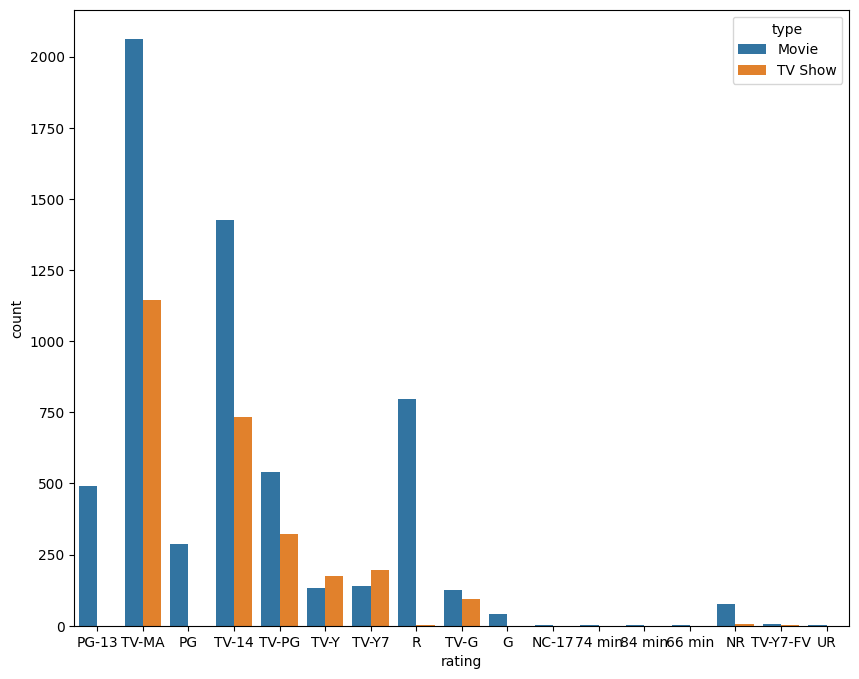

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=df)

<Axes: xlabel='release_year', ylabel='Count'>

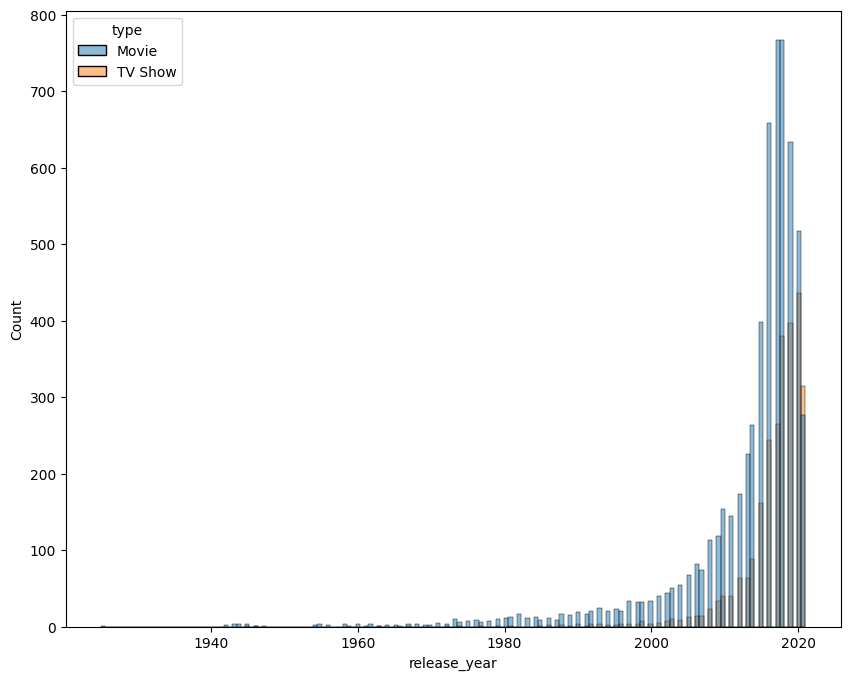

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(x='release_year',hue='type',data=df)


In [32]:
df['date_add']=pd.to_datetime(df['date_added'], errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date_add      8709 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


In [35]:
df['month']=df['date_add'].dt.month.fillna(-1)

In [36]:
df['month']=df['month'].astype('int64')

In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_add,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9


<Axes: xlabel='month', ylabel='count'>

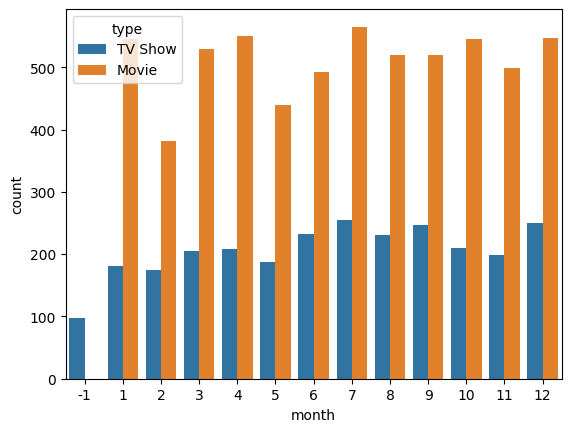

In [38]:
sns.countplot(x='month',hue='type', data=df)